<a href="https://colab.research.google.com/github/Sindhuhar/deep_learning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient descent with Python

In [1]:
#importing necessary packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### Implementing gradient descent with Python

In [2]:
def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
	# compute the derivative of the sigmoid function ASSUMING
	# that the input `x` has already been passed through the sigmoid
	# activation function
	return x * (1 - x)

def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))

	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1

	# return the predictions
	return preds

In [3]:
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-e", "--epochs", type=float, default=100,
# 	help="# of epochs")
# ap.add_argument("-a", "--alpha", type=float, default=0.01,
# 	help="learning rate")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"epochs": 100,
	"alpha": 0.01
}

In [4]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.5, random_state=42)

# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

[INFO] training...


In [5]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# take the dot product between our features "X" and the weight
	# matrix "W", then pass this value through our sigmoid activation
	# function, thereby giving us our predictions on the dataset
	preds = sigmoid_activation(trainX.dot(W))

	# now that we have our predictions, we need to determine the
	# "error", which is the difference between our predictions and
	# the true values
	error = preds - trainY
	loss = np.sum(error ** 2)
	losses.append(loss)

	# the gradient descent update is the dot product between our
	# (1) features and (2) the error of the sigmoid derivative of
	# our predictions
	d = error * sigmoid_deriv(preds)
	gradient = trainX.T.dot(d)

	# in the update stage, all we need to do is "nudge" the weight
	# matrix in the negative direction of the gradient (hence the
	# term "gradient descent" by taking a small step towards a set
	# of "more optimal" parameters
	W += -args["alpha"] * gradient

	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))

[INFO] epoch=1, loss=200.7407391
[INFO] epoch=5, loss=6.1991686
[INFO] epoch=10, loss=3.5932967
[INFO] epoch=15, loss=1.9869034
[INFO] epoch=20, loss=1.0185275
[INFO] epoch=25, loss=0.6050192
[INFO] epoch=30, loss=0.4180554
[INFO] epoch=35, loss=0.3189658
[INFO] epoch=40, loss=0.2592837
[INFO] epoch=45, loss=0.2198700
[INFO] epoch=50, loss=0.1920487
[INFO] epoch=55, loss=0.1714166
[INFO] epoch=60, loss=0.1555321
[INFO] epoch=65, loss=0.1429426
[INFO] epoch=70, loss=0.1327344
[INFO] epoch=75, loss=0.1243053
[INFO] epoch=80, loss=0.1172428
[INFO] epoch=85, loss=0.1112554
[INFO] epoch=90, loss=0.1061306
[INFO] epoch=95, loss=0.1017103
[INFO] epoch=100, loss=0.0978734


[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



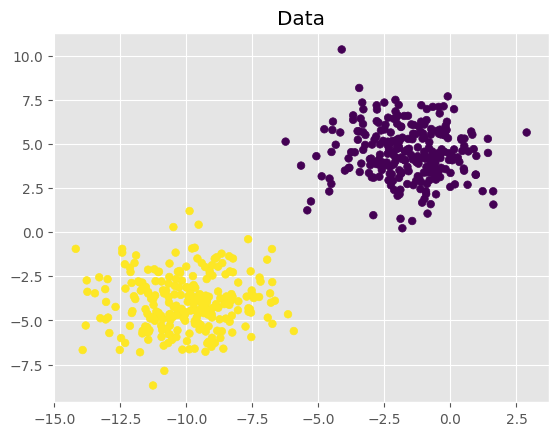

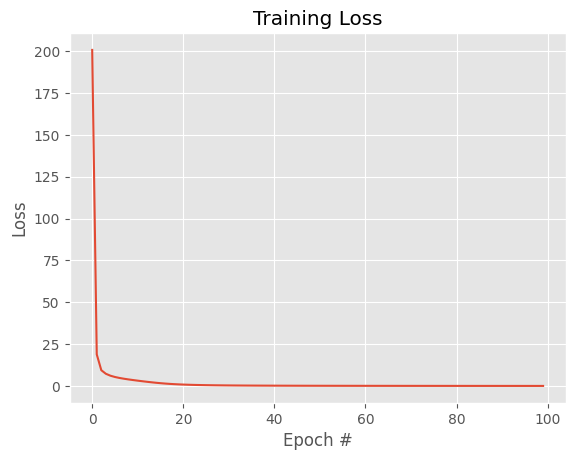

In [6]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, args["epochs"]), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()